# Hotel Analysis

### Supervisior : Dr.Ghassan Shahin 
### Done By : Hiba Nabeel Zalloum

## content: 
* Introduction 
* The problem
* Coding and analysis
* Conclusion 

# Introduction:

Online booking systems bring tour and activity business owners into the 21st century. And when you pair the technology with old-school customer service, your business gets an exciting edge for selling services and filling activities.There is a clear distinction between tourists who are into new technologies and those who still opt for traditional channels. booking modes are considered: telephone, the internet, travel agencies and non-market-based intermediaries. a non-negligible share of tourists continues to make their reservations through offline channels. Understanding tourists’ preferences for the different booking modes has important implications for hotel managers.[1]  

The tourist hotel is an important part of the tourism industry. The tourist destination hotels flow is the indicator of hotel revenue; accurate passenger flow forecasting is the key link in the hotel revenue management , which helps related companies and organizations allocate limited tourism resources scientifically and reasonably to maintain market competitiveness. 

On the other hand, existing non-linear prediction methods are difficult to adapt to the increasing experimental data, and unable to extract feature information automatically, affecting the forecasting accuracy. With the all-round development of the Internet, a large amount of online query index generated by the consumer information search provides a new direction for an overnight traffic forecasting of tourist hotels

# The purpose of the study

in the context of the voluminous data, there may be other characteristic information that may reflect the tourists' potential tourism demands. In future research, it is necessary to further expand other sources of information reflecting the dynamic characteristics of the hotel accommodation demands. 

the constructed analysis hotels framework provides a new solution for the hotel accommodation demand forecasting done by managers of tourism-related departments under the Internet environment, which helps tourism related departments to dynamically monitor the hotel overnights; it provides decision support for realizing the information of the destination management. In addition, the constructed empirical framework can be used to analysis other destination demands such as hotel revenues, etc. It can further be extended to other similar
prediction fields.



# Problem Questions:


* We will try to answer the following Questions
* How Many Booking Were Cancelled?
* What is the booking ratio between Resort Hotel and City Hotel?
* What is the percentage of booking for each year?
* Which is the busiest month for hotels?
* From which country most guests come?
* How Long People Stay in the hotel?
* Which was the most booked accommodation type (Single, Couple, Family)?
* After that, we will make the predictive model to make predictions in the future whether the booking will be canceled or no

# Methodology: 

we will Analysis the data, filling missing data, perform the Feature Engineering to make new features.Perform the Feature Selection to select only relevant features
Transform the Data (Categorial to Numerical).Split the data (Train Test Split).Model the data (Fit the Data).And finally, Evaluate our model

# About of the dataset 

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data.
We will perform exploratory data analysis with python to get insight from the data.

# Coding and Analysis

In [1]:
#import librarys 
import numpy as np # for matrises 
import pandas as pd # dataframs
import matplotlib.pyplot as plt # visualsation
import plotly.express as px # visualsation
import seaborn as sns # visualsation
sns.set_style("dark") # visualsation

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\hotel_bookings.csv")     # to dataframs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df['hotel'].unique()  # make a hotel to unique values

array(['Resort Hotel', 'City Hotel'], dtype=object)

#### we have two class of hotel resort hotel and city hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

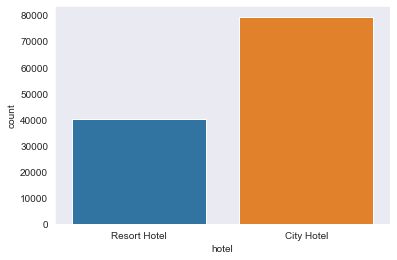

In [6]:
sns.countplot(data=df, x = 'hotel')  #count of hotel gesuts 

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

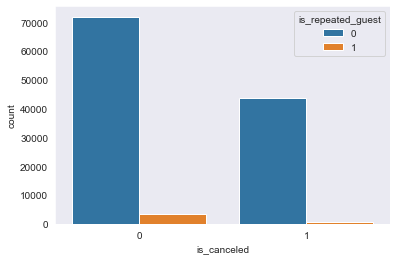

In [7]:
sns.countplot(data=df, x = 'is_canceled', hue='is_repeated_guest') 

we can see that guests that aren't repeated guests canceled the trip which make sense.



<AxesSubplot:xlabel='hotel', ylabel='count'>

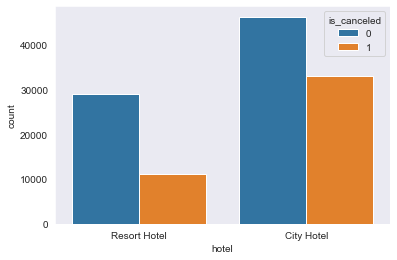

In [8]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')

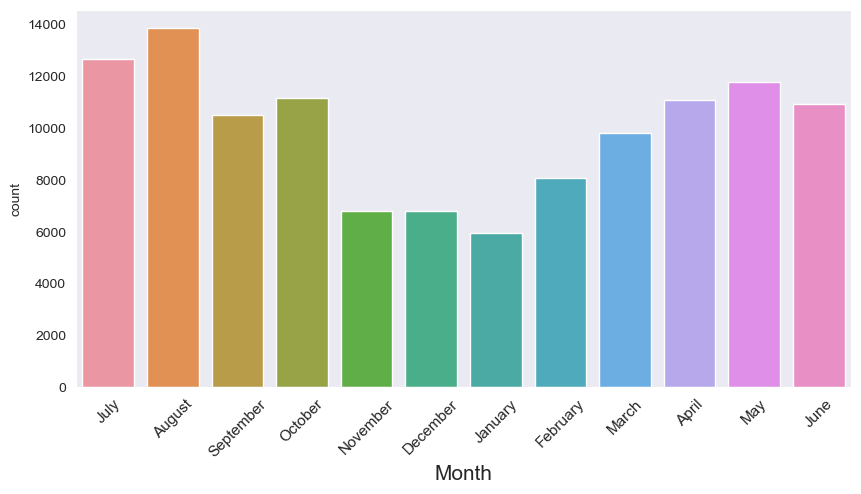

In [9]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=df, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

The above plot shows that August was the busiest month and January was the least.


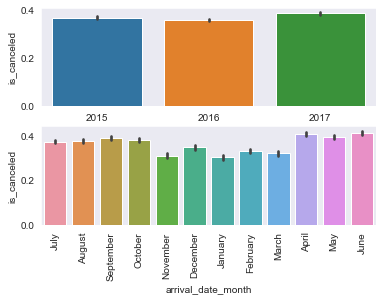

In [10]:
fig, ax =plt.subplots(2,1)
sns.barplot(x = df["arrival_date_year"], y = df["is_canceled"], ax = ax[0])
sns.barplot(x = df["arrival_date_month"], y = df["is_canceled"], ax = ax[1])
plt.xticks(rotation=90)
plt.show()

Extracted some useful insights from arrival_date_month and then created month and year lists. we can conclude that reservation status date plays a huge role whether a guest cancels or not. cancelations tend to decrease after a sudden rise in July.

cancelation varies with year.

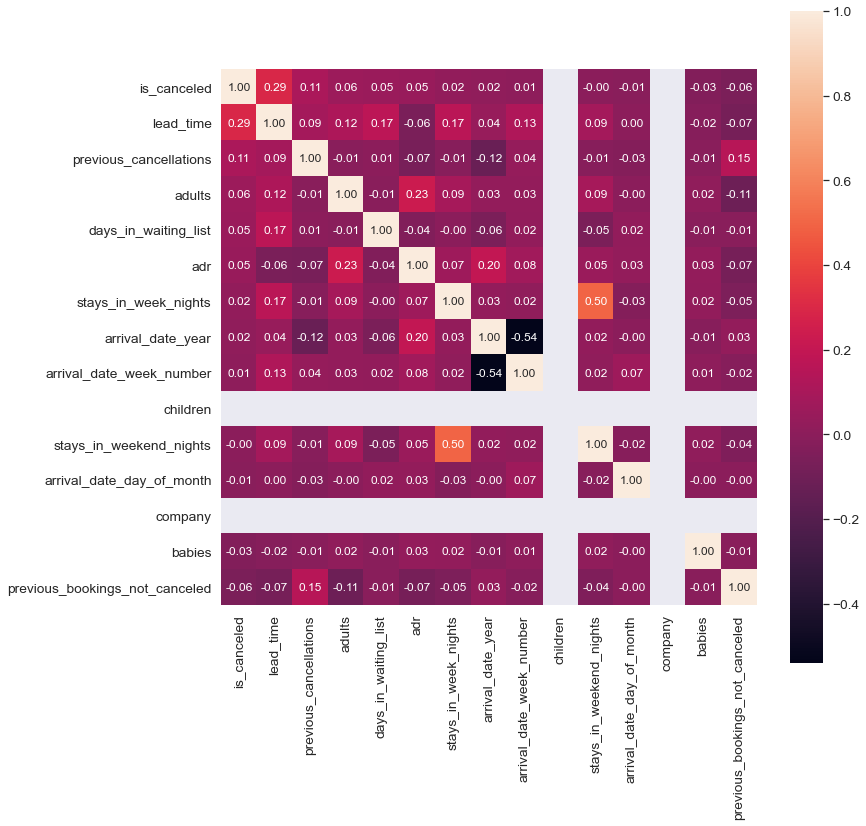

In [11]:
a = df.corr()
plt.figure(figsize=(12,12))
k = 15
cols = a.nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
cor = (df.corr()**2)**0.5
cor_mat = cor["is_canceled"].sort_values(ascending=True)
cor_mat*100

stays_in_weekend_nights             0.179108
children                            0.504779
arrival_date_day_of_month           0.613008
arrival_date_week_number            0.814807
arrival_date_year                   1.665986
company                             2.064207
stays_in_week_nights                2.476463
babies                              3.249109
adr                                 4.755660
days_in_waiting_list                5.418582
previous_bookings_not_canceled      5.735772
adults                              6.001721
agent                               8.311416
is_repeated_guest                   8.479342
previous_cancellations             11.013281
booking_changes                    14.438099
required_car_parking_spaces        19.549782
total_of_special_requests          23.465777
lead_time                          29.312336
is_canceled                       100.000000
Name: is_canceled, dtype: float64

took the abs value of the cor matrix and then sorted it.Dropped columns with cor < 3%.

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

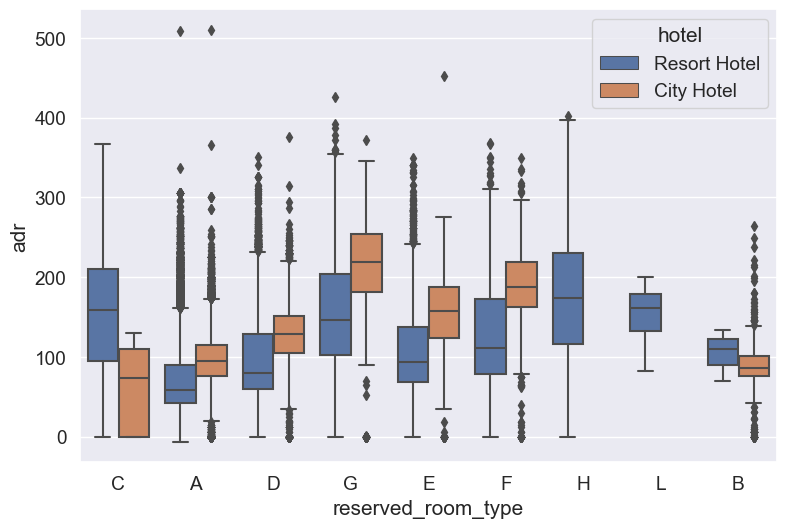

In [13]:
df['reserved_room_type'].unique()
data = df[df['is_canceled'] == 0]
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= data, x = 'reserved_room_type', y = 'adr', hue = 'hotel')

101.83112153446453


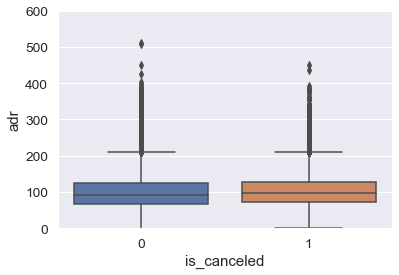

In [14]:
sns.boxplot(data= df,x = 'is_canceled', y='adr')
plt.ylim(0,600)
print(df['adr'].mean())

In [15]:
df['country'].value_counts()


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
SLE        1
ATF        1
NIC        1
ASM        1
CYM        1
Name: country, Length: 177, dtype: int64

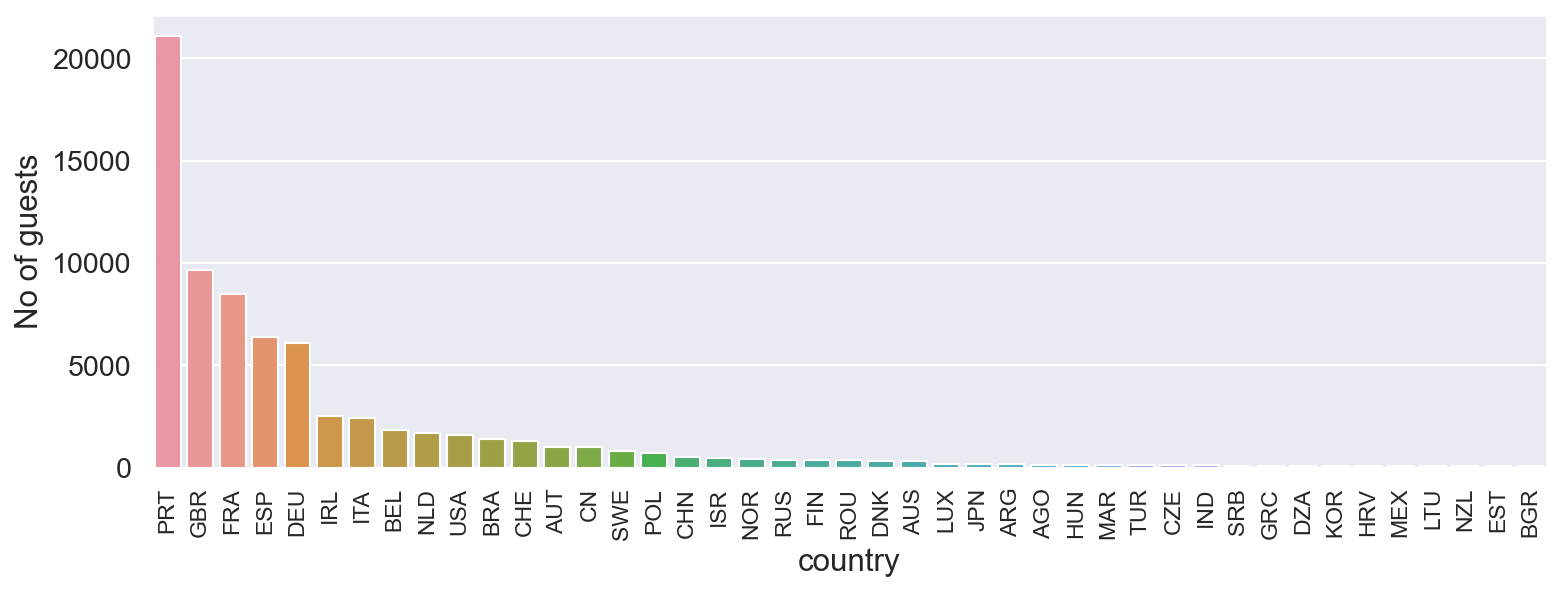

In [16]:
fig = plt.figure(figsize=(12,4), dpi=150)


country_wise_guests = df[(df['is_canceled'] == 0)]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']

country_wise_guests = country_wise_guests[country_wise_guests['No of guests'] > 60]

sns.barplot(data=country_wise_guests, x = 'country', y = 'No of guests')
plt.xticks(rotation=90,fontsize=11);

Most of the guest are from Portugal wich is reasonable because both hotels are in PRT and that could give us a hint to fill out Country missing data with PRT later. Since there was 156 countries, I pickup ones with more than 60 guests so we can have a clear plot

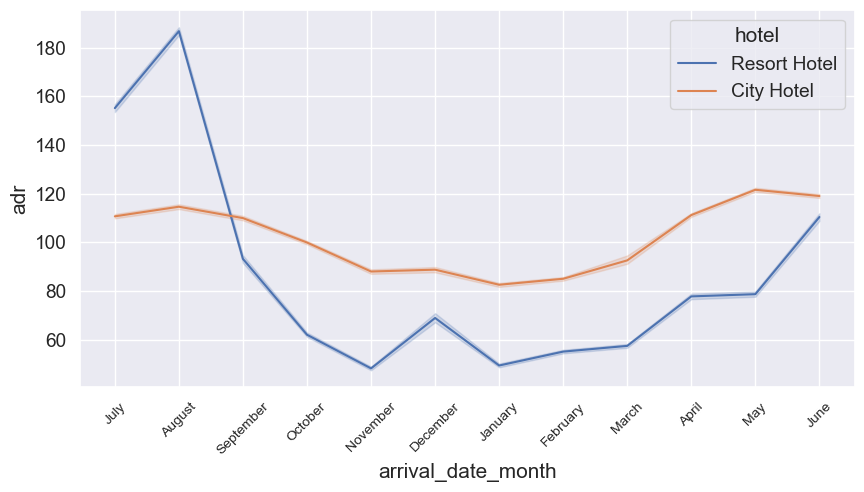

In [17]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(data=df, x= 'arrival_date_month', y = 'adr', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

In general City Hotel has higher prices
This plot shows that in August which was the crowdest month, City hotel charge guests the most.

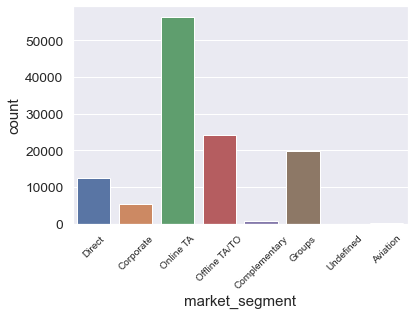

In [18]:
sns.countplot(data=df, x= 'market_segment')
plt.xticks(rotation=45,fontsize=10);

We all know in currect people use of technology are masively increased and we can see in the above plot that almost 50 percent of reservations are apply via Online Travel Agents.


<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

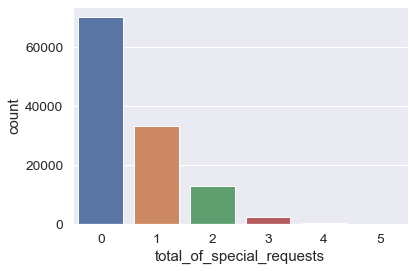

In [19]:
sns.countplot(data=df, x= 'total_of_special_requests')

This is the numbers of special requests. Now let's see its relationship with canselation.


<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

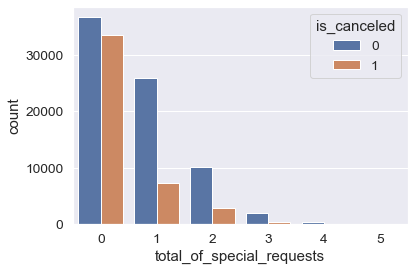

In [20]:
sns.countplot(data=df, x= 'total_of_special_requests', hue='is_canceled')

Nearly half bookings without any special requests have been canceled and another half of them have not been canceled




# Data Prepration

* missing data

In [21]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('PRT')
df = df.drop('company', axis = 1)


In [23]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

* Categorical Data


In [24]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

let's just find the categorical features first:



In [25]:
a = df.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

hotel 2
arrival_date_month 12
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
reservation_status_date 926


According to our result, It's obvious that we can't use one hot encoding for most of our categorical features! because that would create a lot of columns and adds a lot of complexity to our model. Therefore we're going to use label encoding which you can use either Lable Encoder in sklearn or install label converter with pip. I prefer the first way

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [27]:
a = df.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df[i].nunique())
    cat_list.append(i)

hotel 2
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4


In [28]:
for i in cat_list:
    df[i] = le.fit_transform(df[i])
df['year'] = le.fit_transform(df['year'])
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

In [29]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,1,0,342,27,1,0,0,2,0.0,0,...,2,0,0.0,2,0.0,0,0,1,6,0
1,1,0,737,27,1,0,0,2,0.0,0,...,2,0,0.0,2,0.0,0,0,1,6,0
2,1,0,7,27,1,0,1,1,0.0,0,...,0,0,0.0,2,75.0,0,0,1,6,1
3,1,0,13,27,1,0,1,1,0.0,0,...,0,0,304.0,2,75.0,0,0,1,6,1
4,1,0,14,27,1,0,2,2,0.0,0,...,0,0,240.0,2,98.0,0,1,1,6,2


# Train|Test Split


In [ ]:
# from sklearn.model_selection import train_test_split
y = df['is_canceled']
X = df.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.3)

# Feature Scaling


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train The Model


In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)


# Model Evaluation


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)
acc_dtc

0.9533461763966832

# Evaluation

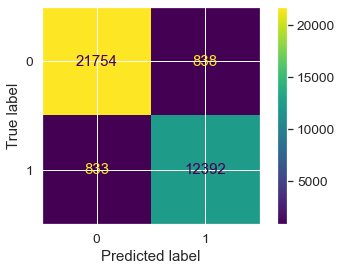

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

In [35]:
print(clf_report)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22592
           1       0.94      0.94      0.94     13225

    accuracy                           0.95     35817
   macro avg       0.95      0.95      0.95     35817
weighted avg       0.95      0.95      0.95     35817



Since the the relationship between our label and features was incomprehensive, in below data frame we will see which feature was more effective in our model

In [36]:
pd.DataFrame(index = X.columns, data = dtc.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
deposit_type,0.231295
arrival_date_week_number,0.189015
month,0.102211
day,0.090504
arrival_date_day_of_month,0.079517
lead_time,0.057132
total_of_special_requests,0.048823
market_segment,0.041493
previous_cancellations,0.032043
stays_in_week_nights,0.020420


Typically we would run a grid-search to test diffrent hyperparameters such min_samples_split, min_samples_leaf and etc, but since we are getting good results there no need for that.

Just to have a visualization of our tree I plot the tree below but since our features are too many, I set max_depth to 3 to get a smaller tree that we can see properly.

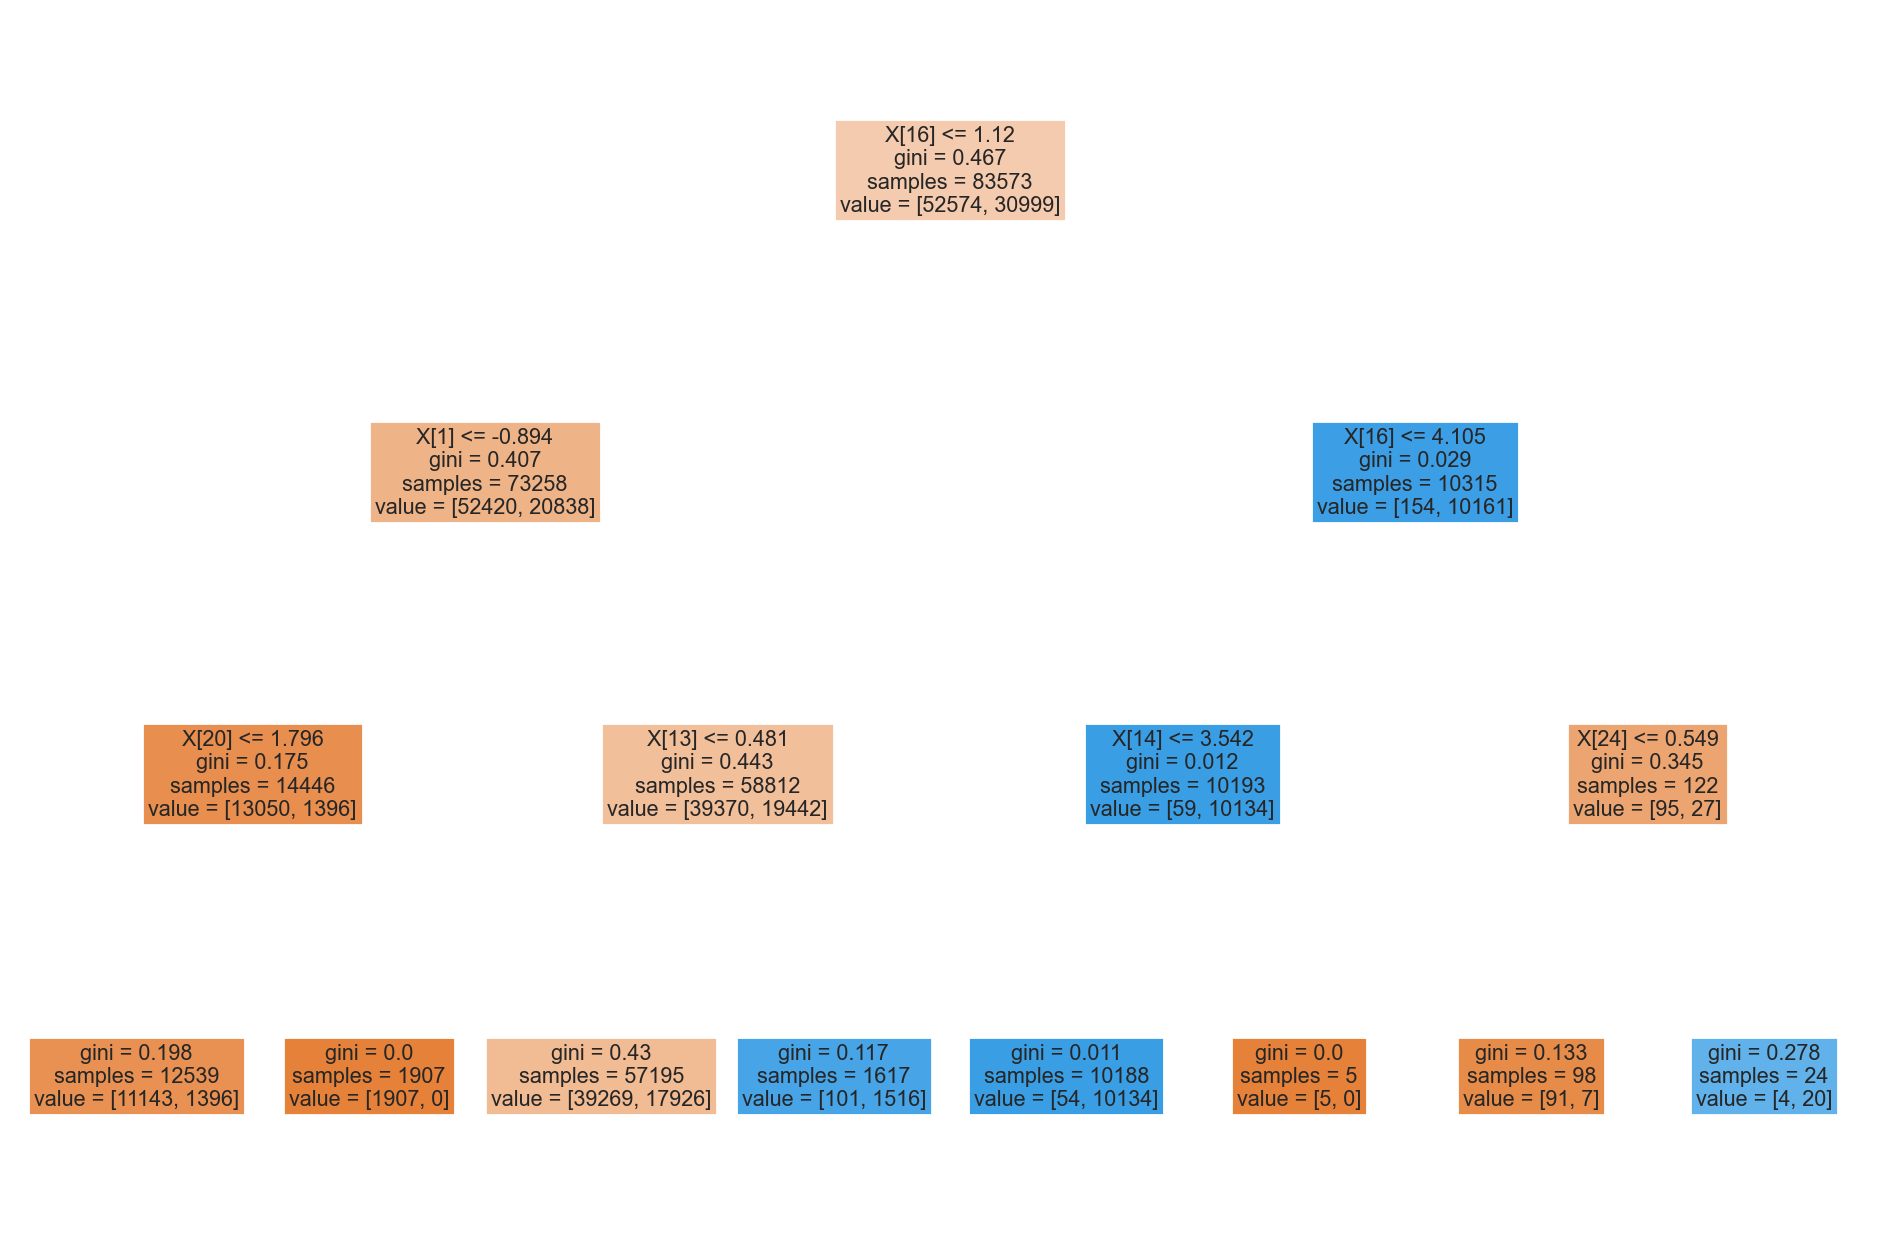

In [37]:
from sklearn.tree import plot_tree



plt.figure(figsize=(12,8), dpi=200)

pruned_dtc = DecisionTreeClassifier(max_depth=3)
pruned_dtc.fit(X_train, y_train)
y_pred_dtc = pruned_dtc.predict(X_test)

plot_tree(pruned_dtc, filled = True);

Decision Trees themeselves are prun to overfitting and we already know that there are many developments that expand of a Decision Tree model such as Random Forest or a Gradient Boosted tree to help expand the decision tree model as well as fix some its potential flaws. Those are more advanced tree base methods that are build of the Decision tree. Thus you don't a single Decision tree in more realistics problems.

# conclusin 

* Almost 35% of bookings were canceled.
* More than 60% of the population booked the City hotel.
* More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.
* Most bookings were made from July to August. And the least bookings were made at the start and end of the year.
* Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.
* Most people stay for one, two, or three.
* For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.
* For City hotel, most popular stay duration is one, two, seven(week), and three respectively
* Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly